This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to deep learning for computer vision

## Introduction to convnets

**Instantiating a small convnet**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

## Training a convnet from scratch on a small dataset

### ... make sure to have the cats_and_dogs_small directory in your working directory

In [6]:
import pathlib

new_base_dir = pathlib.Path('/home/deeph/workspace/keras_examples/jupsi/AllNoteboksOriginals/cats_and_dogs_small') ## or a different path, if the files are stored elsewhere

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2024-03-15 13:42:00.441870: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-15 13:42:00.445987: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-15 13:42:00.446379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-15 13:42:00.446934: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856 

**Configuring the model for training**

In [4]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

### Data preprocessing

**Using `image_dataset_from_directory` to read images**

In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [8]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [9]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [10]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [11]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


2024-03-15 13:43:44.484615: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [12]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


**Fitting the model using a `Dataset`**

In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,  ## when running on CPU, consider to reduce number of epochs
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30


2024-03-15 13:44:03.090886: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2024-03-15 13:44:03.695228: W tensorflow/stream_executor/gpu/asm_compiler.cc:231] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.6
2024-03-15 13:44:03.695241: W tensorflow/stream_executor/gpu/asm_compiler.cc:234] Used ptxas at ptxas
2024-03-15 13:44:03.695283: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-03-15 13:44:04.338375: I tensorflow/stream_executor/cuda/cuda_blas.cc:1760] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


63/63 [==============================] - 4s 23ms/step - loss: 0.7336 - accuracy: 0.5355 - val_loss: 0.7000 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 1s 18ms/step - loss: 0.7063 - accuracy: 0.5450 - val_loss: 0.6896 - val_accuracy: 0.5140
Epoch 3/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6767 - accuracy: 0.6060 - val_loss: 0.6834 - val_accuracy: 0.5750
Epoch 4/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6440 - accuracy: 0.6380 - val_loss: 0.6530 - val_accuracy: 0.6040
Epoch 5/30
63/63 [==============================] - 1s 17ms/step - loss: 0.6250 - accuracy: 0.6805 - val_loss: 0.5767 - val_accuracy: 0.6960
Epoch 6/30
63/63 [==============================] - 1s 19ms/step - loss: 0.5686 - accuracy: 0.7130 - val_loss: 0.6337 - val_accuracy: 0.6270
Epoch 7/30
63/63 [==============================] - 1s 19ms/step - loss: 0.5246 - accuracy: 0.7360 - val_loss: 0.6184 - val_accuracy: 0.6320
Epoch 8/30
63/63 [======

**Displaying curves of loss and accuracy during training**

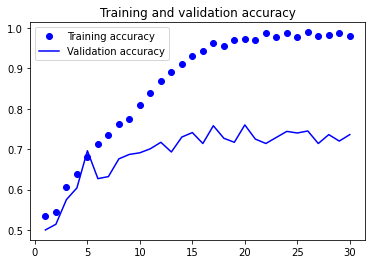

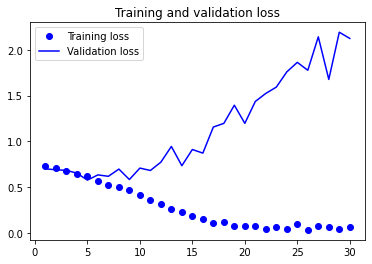

In [14]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Evaluating the model on the test set**

In [15]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 8ms/step - loss: 0.6133 - accuracy: 0.6700
Test accuracy: 0.670


### Using data augmentation

**Define a data augmentation stage to add to an image model**

In [16]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

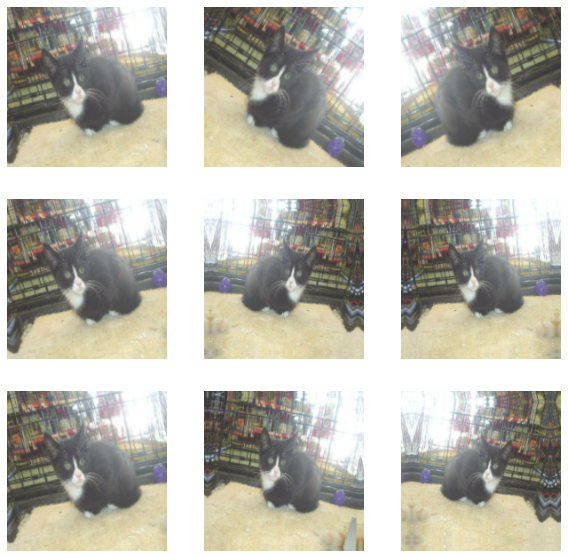

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [18]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

**Training the regularized convnet**

In [19]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,   ## when running on CPU, consider to reduce number of epochs
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 2s 21ms/step - loss: 0.7490 - accuracy: 0.5030 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 1s 18ms/step - loss: 0.7276 - accuracy: 0.5185 - val_loss: 0.6885 - val_accuracy: 0.5070
Epoch 3/100
63/63 [==============================] - 1s 19ms/step - loss: 0.6912 - accuracy: 0.5540 - val_loss: 0.6573 - val_accuracy: 0.5910
Epoch 4/100
63/63 [==============================] - 1s 19ms/step - loss: 0.6732 - accuracy: 0.5925 - val_loss: 0.6744 - val_accuracy: 0.6070
Epoch 5/100
63/63 [==============================] - 1s 19ms/step - loss: 0.6459 - accuracy: 0.6465 - val_loss: 0.6770 - val_accuracy: 0.5910
Epoch 6/100
63/63 [==============================] - 1s 19ms/step - loss: 0.6559 - accuracy: 0.6410 - val_loss: 0.6136 - val_accuracy: 0.6530
Epoch 7/100
63/63 [==============================] - 1s 19ms/step - loss: 0.6205 - accuracy: 0.6765 - val_loss: 0.6236 - val_accuracy: 0.6260
Epoch 

63/63 [==============================] - 1s 19ms/step - loss: 0.2630 - accuracy: 0.8960 - val_loss: 0.6216 - val_accuracy: 0.8290
Epoch 59/100
63/63 [==============================] - 1s 19ms/step - loss: 0.2383 - accuracy: 0.9005 - val_loss: 0.4860 - val_accuracy: 0.8140
Epoch 60/100
63/63 [==============================] - 1s 19ms/step - loss: 0.2416 - accuracy: 0.9035 - val_loss: 0.5308 - val_accuracy: 0.8160
Epoch 61/100
63/63 [==============================] - 1s 19ms/step - loss: 0.2569 - accuracy: 0.8955 - val_loss: 0.6077 - val_accuracy: 0.8080
Epoch 62/100
63/63 [==============================] - 1s 19ms/step - loss: 0.2393 - accuracy: 0.9055 - val_loss: 0.3974 - val_accuracy: 0.8570
Epoch 63/100
63/63 [==============================] - 1s 19ms/step - loss: 0.2427 - accuracy: 0.8990 - val_loss: 0.3967 - val_accuracy: 0.8530
Epoch 64/100
63/63 [==============================] - 1s 19ms/step - loss: 0.2342 - accuracy: 0.9140 - val_loss: 0.4761 - val_accuracy: 0.8360
Epoch 65/100

**Evaluating the model on the test set**

In [20]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 0s 7ms/step - loss: 0.4413 - accuracy: 0.8310
Test accuracy: 0.831


### Try cats & dogs again with transfer learning

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [25]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [26]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [27]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [28]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [29]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 4ms/step - loss: 16.0358 - accuracy: 0.9280 - val_loss: 7.3759 - val_accuracy: 0.9530
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 4.2774 - accuracy: 0.9700 - val_loss: 4.4343 - val_accuracy: 0.9750
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 2.4938 - accuracy: 0.9830 - val_loss: 4.9037 - val_accuracy: 0.9750
Epoch 4/20
63/63 [==============================] - 0s 2ms/step - loss: 0.7125 - accuracy: 0.9935 - val_loss: 3.4856 - val_accuracy: 0.9780
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.9965 - val_loss: 3.2985 - val_accuracy: 0.9800
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.8217 - accuracy: 0.9905 - val_loss: 3.6465 - val_accuracy: 0.9740
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.7976 - accuracy: 0.9930 - val_loss: 6.4324 - val_accuracy: 0.9660
Epoch 8/20
63/63 [=

**Plotting the results**

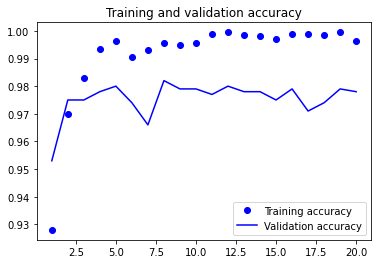

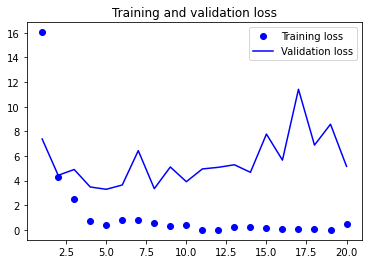

In [30]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

**Instantiating and freezing the VGG16 convolutional base**

In [26]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [27]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [28]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [29]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [30]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 5s 58ms/step - loss: 16.9690 - accuracy: 0.9035 - val_loss: 5.3291 - val_accuracy: 0.9650
Epoch 2/50
63/63 [==============================] - 2s 38ms/step - loss: 7.8710 - accuracy: 0.9400 - val_loss: 4.5996 - val_accuracy: 0.9690
Epoch 3/50
63/63 [==============================] - 2s 38ms/step - loss: 6.3842 - accuracy: 0.9570 - val_loss: 5.3736 - val_accuracy: 0.9680
Epoch 4/50
63/63 [==============================] - 2s 38ms/step - loss: 6.0722 - accuracy: 0.9550 - val_loss: 5.2983 - val_accuracy: 0.9750
Epoch 5/50
63/63 [==============================] - 2s 38ms/step - loss: 4.9884 - accuracy: 0.9615 - val_loss: 13.5737 - val_accuracy: 0.9380
Epoch 6/50
63/63 [==============================] - 2s 38ms/step - loss: 4.3287 - accuracy: 0.9670 - val_loss: 4.3496 - val_accuracy: 0.9760
Epoch 7/50
63/63 [==============================] - 2s 38ms/step - loss: 4.1950 - accuracy: 0.9615 - val_loss: 5.4044 - val_accuracy: 0.9740
Epoch 8/50


**Evaluating the model on the test set**

In [40]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 25ms/step - loss: 2.2759 - accuracy: 0.9740
Test accuracy: 0.974


### Fine-tuning a pretrained model

In [41]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

**Freezing all layers until the fourth from the last**

In [42]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [43]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 4s 46ms/step - loss: 0.2742 - accuracy: 0.9905 - val_loss: 1.4990 - val_accuracy: 0.9830
Epoch 2/30
63/63 [==============================] - 3s 43ms/step - loss: 0.3223 - accuracy: 0.9935 - val_loss: 1.5714 - val_accuracy: 0.9770
Epoch 3/30
63/63 [==============================] - 3s 43ms/step - loss: 0.3702 - accuracy: 0.9885 - val_loss: 1.3122 - val_accuracy: 0.9800
Epoch 4/30
63/63 [==============================] - 3s 43ms/step - loss: 0.1773 - accuracy: 0.9945 - val_loss: 1.5251 - val_accuracy: 0.9810
Epoch 5/30
63/63 [==============================] - 3s 43ms/step - loss: 0.3448 - accuracy: 0.9930 - val_loss: 1.3466 - val_accuracy: 0.9780
Epoch 6/30
63/63 [==============================] - 3s 43ms/step - loss: 0.1264 - accuracy: 0.9945 - val_loss: 1.6612 - val_accuracy: 0.9770
Epoch 7/30
63/63 [==============================] - 3s 43ms/step - loss: 0.1741 - accuracy: 0.9915 - val_loss: 1.6096 - val_accuracy: 0.9790
Epoch 8/30
63

In [44]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 24ms/step - loss: 1.1744 - accuracy: 0.9810
Test accuracy: 0.981


#### Feature extraction together with data augmentation

## Summary